In [1404]:
%matplotlib inline
import json
speeches=[]
with open('speeches.json') as f:
    for line in f:
        speeches.append(json.loads(line))

In [1405]:
import string
import re
def clean_and_split(s):
    # string.punctuation is a string with all the different punctuation symbols.
    # ’tr’ is an object that will assign blank space to each punctuation symbol.
    tr=str.maketrans(string.punctuation," "*len(string.punctuation))
    s=s.lower().translate(tr)
    # replace \r\n
    s = re.sub('(\r\n)+',' ',s)
    # replace whitespace substrings with one whitespace and remove leading/trailing whitespace
    s = re.sub(' +',' ',s.strip())
    s=s.split(' ')
    return s

In [1406]:
#This creates a dataframe for the list of words with size and index 1.
def toDataFrame(s):
    df = pd.DataFrame({'words':clean_and_split(s.get('text'))})
    df_trim = df.groupby(df.columns.tolist(), as_index=False).size()
    sorted = df_trim.sort_values("size").reset_index().drop(columns = 'index')
    sorted = sorted.reset_index().drop(columns = 'index')
    sorted['idx']=1
    return sorted



In [1407]:
#add up all speeches and group by words/indexes.
v = toDataFrame(speeches[0])
for i in range(1,len(speeches)):
    v = pd.concat([v, toDataFrame(speeches[i])]).groupby(["words"], as_index=False).sum()

In [1408]:
#sort by values and rearrange the index
v = v.sort_values("size").reset_index().drop(columns = 'index')
#truncate words that appear less than 50 times and 20 most frequently appearing words.
vocab = v.drop(np.where((v.get('size') < 50).tolist())[0])[:-20].reset_index().drop(columns = 'index')
#discard numeric elements
vocab = vocab.drop(np.where([1 if vocab.get('words')[i].isnumeric() else 0 for i in range(len(vocab))])[0]).reset_index().drop(columns = 'index')

In [1409]:
#let us record the logarithm part in the formula
propor = {vocab.get('words')[0]:np.log(226/vocab.get('idx')[0])}
for i in range(1,3174):
    propor.update({vocab.get('words')[i]:np.log(226/vocab.get('idx')[i])})

In [1410]:
#create a dictionary that has words and sizes
dictionary = {}
for j in range(226):
    diction = {}
    word = toDataFrame(speeches[j]).get('words').tolist()
    size = toDataFrame(speeches[j]).get('size').tolist()
    diction.update({word[0]:size[0]})
    for i in range(1,len(word)):
        diction.update({word[i]:size[i]})
    dictionary.update({j:diction})
    

In [1411]:
#get our desired data
vectors = {}
for j in range(226):
    v={}
    for i in range(len(vocab.get('words').tolist())):
        v.update({i:dictionary.get(j).get(vocab.get('words').tolist()[i], 0) * propor.get(vocab.get('words').tolist()[i], 0)})
    vectors.update({j:v})

In [1301]:
vectors
#I represent TF-IDF by dictionary. In order to get vector for a speech in index i, we simly
#access this by vectors.get(i).values(), and we may change this into the list.

dict_values([0.0, 0.0, 0.0, 0.0, 0.0, 1.706962932567978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6593348835787234, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8370160608161759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.623490666339784, 0.0, 1.8096170866280614, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.053239169285812, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6593348835787234, 0.0, 0.0, 0.0, 0.0, 0.0, 1.706962932567978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8096170866280614, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8096170866280614, 0.0, 0.0, 3.973095589574279, 0.0, 0.0, 0.0, 0.0, 1.8370160608161759, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.706962932567978, 0.0, 0.0, 0.0, 0.

(b) 1.

In [1302]:
#get a matrix that gives sim for all different indexes
similarity = np.zeros((226,226))
for i in range(226):
    for j in range(i, 226):
        similarity[i,j] = sum([x*y for x,y in zip(list(vectors.get(i).values()), list(vectors.get(j).values()))])/(np.sqrt(sum([x*y for x,y in zip(list(vectors.get(i).values()), list(vectors.get(i).values()))])) * np.sqrt(sum([x*y for x,y in zip(list(vectors.get(j).values()), list(vectors.get(j).values()))])))

In [1304]:
#diagonal elements are all zero
for i in range(226):
    similarity[i,i]=0

In [1307]:
#let us get duplicates
from collections import Counter, defaultdict

t = [0] * 226
for i in range(226):
    t[i] = speeches[i].get('president')

def duplicates(lst):
    cnt= Counter(lst)
    return [key for key in cnt.keys() if cnt[key]> 1]

def indices(lst, items= None):
    items, ind= set(lst) if items is None else items, defaultdict(list)
    for i, v in enumerate(lst):
        if v in items: ind[v].append(i)
    return ind
dup = indices(t, duplicates(t))

In [1308]:
samepr = np.zeros((226,226))
for i in range(len(list(dup.values()))):
        for j in range(len(list(dup.values())[i])):
                for k in range(j, len(list(dup.values())[i])):
                    a = list(dup.values())[i][j]
                    b = list(dup.values())[i][k]
                    samepr[a,b] = sum([x*y for x,y in zip(list(vectors.get(a).values()), list(vectors.get(b).values()))])/(np.sqrt(sum([x*y for x,y in zip(list(vectors.get(a).values()), list(vectors.get(a).values()))])) * np.sqrt(sum([x*y for x,y in zip(list(vectors.get(b).values()), list(vectors.get(b).values()))])))
for i in range(226):
    samepr[i,i]=0

In [1310]:
#get a matrix which incodes similarity between different presidents
diffpr = similarity - samepr

In [1311]:
#let us print this
indexesdf = np.c_[np.unravel_index(np.argpartition(diffpr.ravel(),-50)[-50:],diffpr.shape)]
for i in range(len(indexesdf)):
    print(speeches[indexesdf[i][0]].get('president') + ' in ' + speeches[indexesdf[i][0]].get('year') + ' and ' + speeches[indexesdf[i][1]].get('president') + ' in ' + speeches[indexesdf[i][1]].get('year'))


James K. Polk in 1845 and John Tyler in 1844
Barack Obama in 2012 and Ronald Reagan in 1987
William J. Clinton in 1998 and George Bush in 1992
Grover Cleveland in 1885 and Benjamin Harrison in 1891
Barack Obama in 2009 and William J. Clinton in 2000
Barack Obama in 2010 and George Bush in 1989
Barack Obama in 2010 and Ronald Reagan in 1987
William J. Clinton in 1998 and Ronald Reagan in 1985
Ronald Reagan in 1988 and George Bush in 1990
Rutherford B. Hayes in 1877 and Grover Cleveland in 1885
Barack Obama in 2010 and Ronald Reagan in 1982
Grover Cleveland in 1885 and Rutherford B. Hayes in 1880
George Bush in 1992 and William J. Clinton in 2000
George Bush in 1992 and William J. Clinton in 1993
William J. Clinton in 1998 and George Bush in 1989
Barack Obama in 2011 and George Bush in 1989
Barack Obama in 2011 and Ronald Reagan in 1987
Martin Van Buren in 1839 and Andrew Jackson in 1836
William J. Clinton in 1995 and Ronald Reagan in 1987
Barack Obama in 2012 and William J. Clinton in 1

2.

In [1312]:
indexessame = np.c_[np.unravel_index(np.argpartition(samepr.ravel(),-50)[-50:],samepr.shape)]
for i in range(len(indexessame)):
    print(speeches[indexessame[i][0]].get('president') + ' in ' + speeches[indexessame[i][0]].get('year') + ' and ' + speeches[indexessame[i][1]].get('year'))


Grover Cleveland in 1894 and 1896
Rutherford B. Hayes in 1879 and 1880
Theodore Roosevelt in 1907 and 1906
Dwight D. Eisenhower in 1955 and 1954
George W. Bush in 2006 and 2004
William Howard Taft in 1909 and 1910
William J. Clinton in 1998 and 2000
George W. Bush in 2007 and 2004
Theodore Roosevelt in 1908 and 1907
Barack Obama in 2011 and 2012
Andrew Jackson in 1835 and 1834
William McKinley in 1900 and 1899
William McKinley in 1899 and 1898
Barack Obama in 2010 and 2011
Dwight D. Eisenhower in 1955 and 1956
William J. Clinton in 1997 and 2000
George W. Bush in 2003 and 2008
Grover Cleveland in 1886 and 1885
William J. Clinton in 1998 and 1997
Barack Obama in 2010 and 2012
George W. Bush in 2004 and 2005
George W. Bush in 2003 and 2004
William J. Clinton in 1998 and 1999
Barack Obama in 2009 and 2011
Theodore Roosevelt in 1905 and 1907
Ronald Reagan in 1981 and 1982
William J. Clinton in 1998 and 1995
William Howard Taft in 1912 and 1910
William J. Clinton in 1999 and 1997
George W. 

3.

In [1313]:
indexesall = np.c_[np.unravel_index(np.argpartition(similarity.ravel(),-25)[-25:],similarity.shape)]
for i in range(len(indexesall)):
    print(speeches[indexesall[i][0]].get('president') + ' in ' + speeches[indexesall[i][0]].get('year') + ' and ' + speeches[indexesdf[i][1]].get('president') + ' in ' + speeches[indexesall[i][1]].get('year'))


William McKinley in 1900 and John Tyler in 1899
George W. Bush in 2004 and Ronald Reagan in 2008
William J. Clinton in 1995 and George Bush in 1992
Barack Obama in 2009 and Benjamin Harrison in 2011
Ronald Reagan in 1981 and William J. Clinton in 1982
William J. Clinton in 1995 and George Bush in 1994
George W. Bush in 2007 and Ronald Reagan in 2008
George W. Bush in 2007 and Ronald Reagan in 2005
Barack Obama in 2010 and George Bush in 2011
Barack Obama in 2009 and Grover Cleveland in 2012
Barack Obama in 2013 and Ronald Reagan in 2012
Barack Obama in 2011 and Rutherford B. Hayes in 2012
William J. Clinton in 1998 and William J. Clinton in 1999
William J. Clinton in 1999 and William J. Clinton in 2000
Barack Obama in 2010 and George Bush in 2012
William J. Clinton in 1995 and George Bush in 2012
George W. Bush in 2008 and Ronald Reagan in 2005
William J. Clinton in 1999 and Andrew Jackson in 1997
Lyndon B. Johnson in 1966 and Ronald Reagan in 1967
William J. Clinton in 1995 and Willia

I do not feel much similarity when I read those documents. I feel that we should take into account for example the length of each sentence or the style of the language by further categorizing each word.

In [ ]:
(c)

In [1316]:
from sklearn.cluster import KMeans
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

tf_idf_mat = np.vstack(list(vectors[i].values()) for i in range(226))
for j in range(1,15):
    model = KMeans(n_clusters = j)
    sou_clust = model.fit(tf_idf_mat)
    print([len((model.predict(tf_idf_mat)==i).nonzero()[0]) for i in range(j)])

[226]
[225, 1]
[166, 1, 59]
[168, 1, 56, 1]
[1, 150, 1, 36, 38]
[1, 155, 1, 28, 34, 7]
[30, 63, 1, 1, 6, 3, 122]
[15, 120, 1, 1, 7, 1, 14, 67]
[115, 1, 1, 36, 1, 3, 1, 59, 9]
[1, 1, 108, 3, 65, 6, 7, 12, 21, 2]
[5, 50, 1, 46, 10, 95, 6, 10, 1, 1, 1]
[116, 1, 9, 6, 3, 3, 1, 14, 2, 69, 1, 1]
[74, 3, 1, 108, 3, 4, 1, 1, 6, 1, 2, 15, 7]
[2, 7, 1, 1, 3, 29, 48, 2, 3, 1, 4, 93, 25, 7]


We observe that a clustering with very small number of elements exists. This is a clustering based on the number of appearance of words in each document quantitatively in relative to the whole document. However since each document can have very different number of overall words as we oberseved in hw1, the validity of this result questionable.

(d) i.

In [1400]:
A = np.matrix([[np.linalg.norm(np.array(list((vectors[i].values())))-np.array(list((vectors[j].values())))) for i in range(226)] for j in range(226)])
h = np.mean(A)
W = np.exp(-A/h)
D = np.matrix([[np.array(W.sum(axis=1))[i][0] if i == j else 0 for i in range(226)] for j in range(226)])
#calculate W tilde
Wt = np.matmul(np.matmul(np.linalg.inv(np.sqrt(D)), W), np.linalg.inv(np.sqrt(D)))

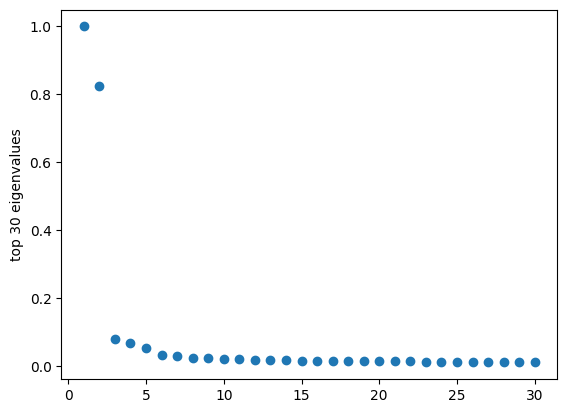

In [1401]:
%matplotlib inline
import matplotlib.pyplot as plt

val, vec = np.linalg.eig(Wt)
plt.ylabel('top 30 eigenvalues')
plt.scatter([range(1,31)], np.array(val[0:30]))
plt.show() 



ii.

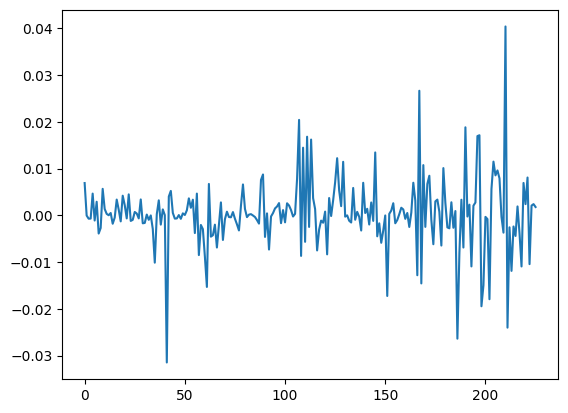

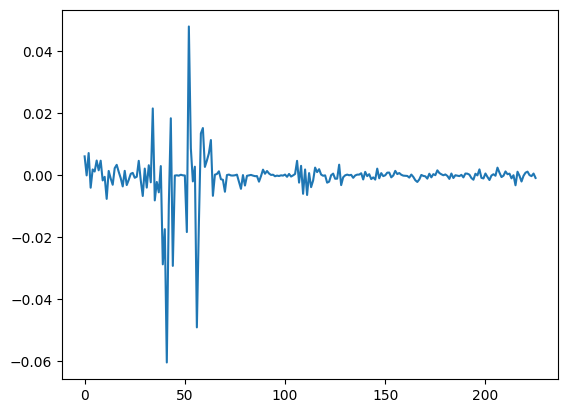

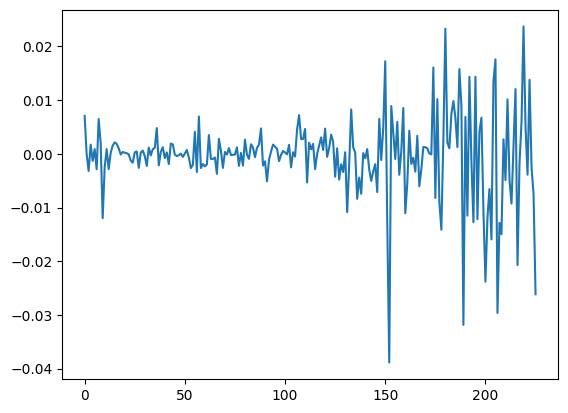

In [1402]:
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[0])))
plt.show()
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[1])))
plt.show()
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[2])))
plt.show()


iii.

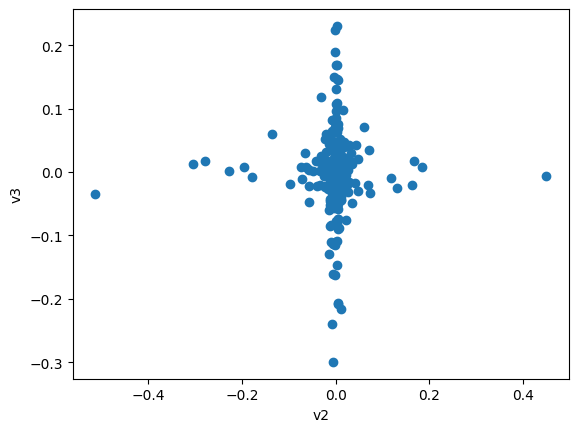

In [1403]:
plt.xlabel('v2')
plt.ylabel('v3')
plt.scatter(np.array(vec[1]), np.array(vec[2]))
plt.show()

#we have this oscilation because circulent matrix has an eigenvector that involves trigonometry which is periodic.


iv.

In [1394]:
#let us use the normalized one
A = np.matrix([[np.linalg.norm(np.array(list((vectors[i].values()))/np.linalg.norm(list(vectors[i].values())))-np.array(list((vectors[j].values()))/np.linalg.norm(list(vectors[j].values())))) for i in range(226)] for j in range(226)])
h = np.mean(A)
W = np.exp(-A/h)
D = np.matrix([[np.array(W.sum(axis=1))[i][0] if i == j else 0 for i in range(226)] for j in range(226)])
#calculate W tilde
Wt = np.matmul(np.matmul(np.linalg.inv(np.sqrt(D)), W), np.linalg.inv(np.sqrt(D)))

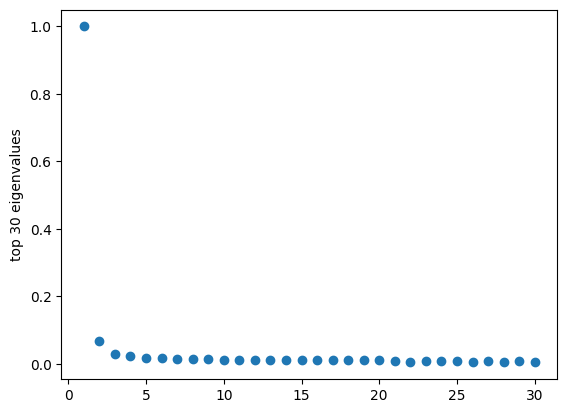

In [1395]:
%matplotlib inline
import matplotlib.pyplot as plt

val, vec = np.linalg.eig(Wt)
plt.ylabel('top 30 eigenvalues')
plt.scatter([range(1,31)], np.array(val[0:30]))
plt.show()

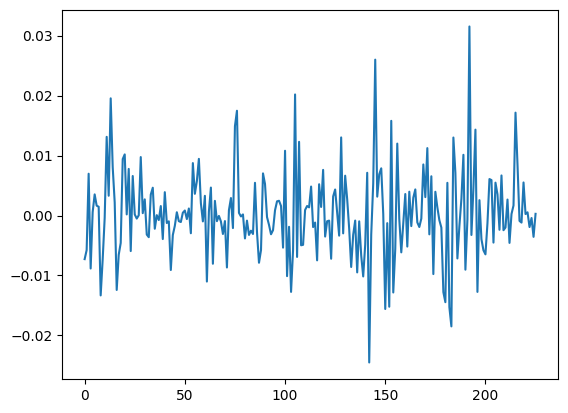

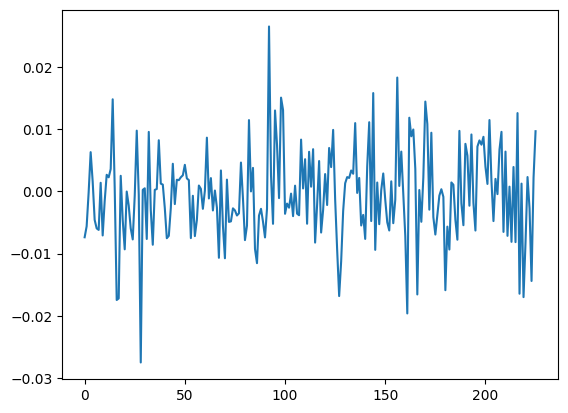

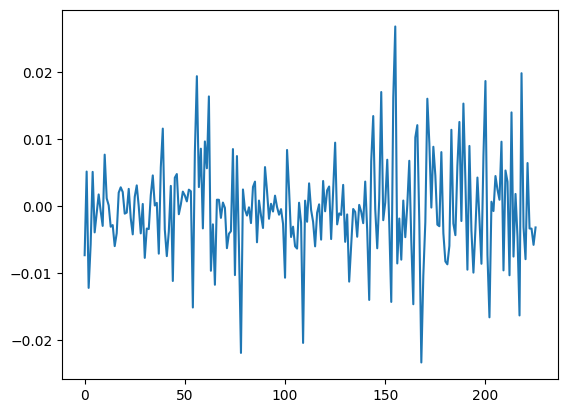

In [1396]:
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[0])))
plt.show()
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[1])))
plt.show()
plt.plot(np.matmul(np.linalg.inv(np.sqrt(D)), np.matrix.transpose(vec[2])))
plt.show()

In [1397]:
years = [0 for i in range(226)]
for i in range(226):
    years[i] = speeches[i].get('year')

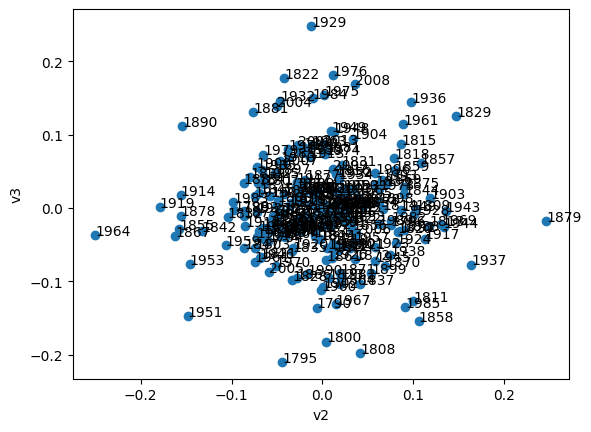

<Figure size 1000x1000 with 0 Axes>

In [1399]:
import matplotlib.pyplot as plt

z = list(np.array(vec[1])[0])
y = list(np.array(vec[2])[0])
fig, ax = plt.subplots()
plt.xlabel('v2')
plt.ylabel('v3')
ax.scatter(z, y)
for i, txt in enumerate(years):
    ax.annotate(txt, (z[i], y[i]))
plt.figure(figsize = (10,10))
plt.show()


This demonstrates more sporadic picture. Heuristically I suspect that this is just a normalizing effect, which in a way "standardizes" every data point. We have more variability of v2 in particular - since it has much smaller eigenvalue. 